In [2]:
!pip install selenium


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

ModuleNotFoundError: No module named 'wordcloud'

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [7]:
macbook_air=[]

In [8]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   

In [9]:
macbook_air

["\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i did not felt about it compared to the performance it was given. Also fingerprint wont be noticeable if the screen is onI thought of buying a screen card for mac (actually I purchased on amazon) to prote

In [10]:
len(macbook_air)

230

In [11]:
rev={"review":macbook_air}

In [12]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [13]:
review_data

,review
0,\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i ...
1,"\nValue for money laptopIf u r looking for programming this is the oneIt has better power efficiency,better screen quality, smooth & fast UI & small in sizeM1 is still better option... M2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
2,"\nLoved everything about this one. This one was a love at first sight but took me years to buy. I am really happy with the delivery and genuineness and it was worth it for INR 82,990. Thank you Amazon.\n"
3,\nHinge issues... Sometimes don't open by single handed... Rest everything is heaven\n
4,\nGud superpower delivery by Amazon on time\n
...,...
225,\nBest value for money..\n
226,\nGood upgrade from MacBook Pro 2012 to MacBook Air M1 chip .. still using MacBook Pro after upgrading ram and using SSD 😅\n
227,"\nFrom snappy performance to battery life to ease of use;not one,but many great features which are not available even to the laptop double its price.\n"
228,"\nSleek, light weight and supports heavy editing softwares without slowing it down.\n"


In [14]:
text=" ".join(review_data)

In [15]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [16]:
review_data

,review
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n"
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n
4,\ngud superpower delivery by amazon on time\n
...,...
225,\nbest value for money..\n
226,\ngood upgrade from macbook pro 2012 to macbook air m1 chip .. still using macbook pro after upgrading ram and using ssd 😅\n
227,"\nfrom snappy performance to battery life to ease of use;not one,but many great features which are not available even to the laptop double its price.\n"
228,"\nsleek, light weight and supports heavy editing softwares without slowing it down.\n"


In [17]:
text=" ".join(review_data["review"])

In [21]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [23]:
review_data

,review
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n"
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n
4,\ngud superpower delivery by amazon on time\n
...,...
225,\nbest value for money..\n
226,\ngood upgrade from macbook pro 2012 to macbook air m1 chip .. still using macbook pro after upgrading ram and using ssd 😅\n
227,"\nfrom snappy performance to battery life to ease of use;not one,but many great features which are not available even to the laptop double its price.\n"
228,"\nsleek, light weight and supports heavy editing softwares without slowing it down.\n"


In [24]:
text=" ".join(review_data["review"])

In [25]:
text

'\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i did not felt about it compared to the performance it was given. also fingerprint wont be noticeable if the screen is oni thought of buying a screen card for mac (actually i purchased on amazon) to protec

In [27]:
import nltk

In [29]:
from nltk import word_tokenize

In [34]:
from nltk.tokenize import word_tokenize

In [39]:
text_tokens = word_tokenize(text)

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
text_tokens

['i',
 'was',
 'using',
 'macbook',
 'air',
 'early',
 '2015',
 'before',
 '.',
 'it',
 'was',
 'performing',
 'ok',
 'since',
 'i',
 'purchased',
 'until',
 '2022.',
 'but',
 'i',
 'started',
 'facing',
 'unexpected',
 'shutdown',
 'due',
 'to',
 'poor',
 'battery',
 'condition',
 '.',
 'hence',
 'i',
 'upgraded',
 'to',
 'm1',
 'mac',
 'in',
 'exchange',
 'offer',
 '.',
 'i',
 'got',
 'around',
 '18k',
 'exchange',
 'value',
 'which',
 'was',
 'surprising',
 'for',
 'me.after',
 'i',
 'started',
 'using',
 'this',
 'i',
 'fell',
 'in',
 'love',
 'with',
 'this',
 'due',
 'to',
 'following',
 'pros1',
 '.',
 'excellent',
 'battery',
 'life',
 '(',
 'mora',
 'than',
 '12',
 'hours',
 'continues',
 'usage',
 ')',
 '2.',
 'excellent',
 'performance',
 'compared',
 'to',
 'my',
 'previous',
 'macbook',
 '2015',
 'model',
 '(',
 'more',
 'than',
 '200',
 '%',
 'bump',
 'in',
 'performance',
 'i',
 'felt',
 ')',
 '3.',
 'excellent',
 'display',
 'qualityi',
 'did',
 'not',
 'feel',
 'any',


In [43]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
tf=TfidfVectorizer()

In [45]:
text_tf=tf.fit_transform(text_without_sw)

In [46]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
df

,000,10,100,1000,10finally,10get,10hours,10i,10light,10watch,...,written,wt,xps,year,years,yet,you,youtube,yrs,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
words_list=" ".join(df)

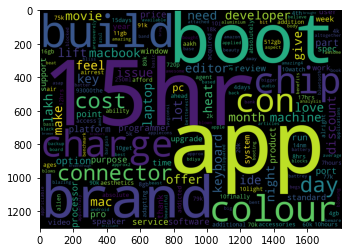

In [50]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [52]:
with open ("C:\XboxGames\positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [56]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [55]:
with open ("C:\XboxGames\positive-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]    

In [57]:
pos_text=" ".join([word for word in df if not word  in positive_words])


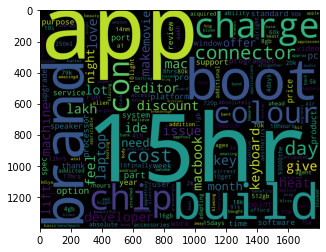

In [58]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

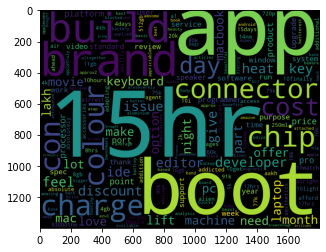

In [59]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [66]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n,0.357143,-0.035714
4,\ngud superpower delivery by amazon on time\n,0.000000,0.000000
...,...,...,...
225,\nbest value for money..\n,0.300000,1.000000
226,\ngood upgrade from macbook pro 2012 to macbook air m1 chip .. still using macbook pro after upgrading ram and using ssd 😅\n,0.600000,0.700000
227,"\nfrom snappy performance to battery life to ease of use;not one,but many great features which are not available even to the laptop double its price.\n",0.412500,0.275000
228,"\nsleek, light weight and supports heavy editing softwares without slowing it down.\n",0.496296,0.014815


In [65]:
from textblob import TextBlob

In [67]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data


,review,subjectivity,polarity,analysis
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716,Positive
1,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333,Positive
2,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000,Positive
3,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n,0.357143,-0.035714,Negative
4,\ngud superpower delivery by amazon on time\n,0.000000,0.000000,Neutral
...,...,...,...,...
225,\nbest value for money..\n,0.300000,1.000000,Positive
226,\ngood upgrade from macbook pro 2012 to macbook air m1 chip .. still using macbook pro after upgrading ram and using ssd 😅\n,0.600000,0.700000,Positive
227,"\nfrom snappy performance to battery life to ease of use;not one,but many great features which are not available even to the laptop double its price.\n",0.412500,0.275000,Positive
228,"\nsleek, light weight and supports heavy editing softwares without slowing it down.\n",0.496296,0.014815,Positive


In [68]:
review_data['analysis'].value_counts()

Positive    197
Neutral      25
Negative      8
Name: analysis, dtype: int64

In [69]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [70]:
#negative comments
(19/199)*100

9.547738693467336

In [ ]:
so in this review data only 9% is about the negative comments so the macbook air product Received good product reviews from users